# The Curse of Dimensionality

To obtain efficient frontier of N Securities one must estimate:
- **N** expected returns and **N** volaitily parameters
- [N(N-1)/2] correlations

Because we would be needing astronomical numbers as our **N** grows, we run into serious problem as we need a lot of data.

To solve this issue we can apply few technics. 
- No Model Risk - High Sample Risk : Estimate the **The Sample Covariance Estimate**
- Constant Correlation Model -> Assume that all the correlation parameters are identical.
    
        Cut the number [N(N-1)/2] of correlation parameters down to 1
    
        The optimal estimator of this constant correlation is the "global" average.





!!!!!! Dissertation !!!!!!
# The Covariance Matrix with the Factor Model

Simplest model is Sharpe's Single Factor Market Model
- Regress the asset returns on the market. 

A single factor model isn't gonna do much so we should also add Explicit Factor Model, Macro Factors
- Inflation
- Interest Rates

Another option is Micro Factors
- Characteristics of the portfolio
- Attributes of the stocks

Implicit Factor Model, Statistical Factors
- Statistical analyses

Using a factor model is a convenient way to reduce the number of risk parameters. To estimate while introducing a reasonable amount of model risk.

An implicit factor model is often preferred since it lets the data tell us what the relevant factors are thus alleviating model risk.





!!!!! Dissertation !!!!!
# Shrinking the Covariance Matrix

There is a paper called "Honey I shrunk the Covariance Matrix(2004)"

We shrink the covariance matrix by taking the sample risk and the model risk together. Using both in a function to get our new Shrinked Covariance Matrix.

The mixture of the sample risk and the model risk is proven to be better than having only to use one of them.

Another paper "Jagannathan and Ma(2003)" that shows imposing constraints on weights is equivalent to perform statistical shrinkage.

Statistical Shrinkage allows one to find the optimal trade-off between sample risk and model risk.

It is based on an average of two covariance matrix estimates, one with high sample risk and one with high model risk.

# Volatility

Volatility varies over time.

In this context using rolling windows is better than using expanding windows.

In all cases,Historical Volatility Estimates are Backward Looking in nature they give an estimate for the average volatility over the sample period.


# Exponentially Weighted Moving Averages

In this model, the weights decline exponentially as we move back through time.


If you are using this model the it is okay to use expanding windows.



# Estimating Covariance and Expected Returns

We've backtested CW and EW Portfolios and they each have unique positions in industrial implementations.

CapWeighted portfolios are the overall average and hence the de-facto industry standard. They are very inexpensive to implement and feature very low turnover. In many ways, they are the default go-to implementation choice for many investors.

However, we've seen that they suffer from some disadvantages, so there is some room for improvement.

EW are the most obvious improvement because they are the only other technique we are going to look at (other than CW) that requires no estimation of either covariance or expected returns. We've already backtested those and we've seen how easy they are to build.

We'll now move on the more sophisticated portfolio construction techniques, but they will get us involved in the estimation game, something we've avoided so far ... so let's start by pulling in the data we need and start with the CW and EW portfolios, since they are the baseline portfolios.

In [1]:
import numpy as np
import pandas as pd

import risk_kit as rk

%load_ext autoreload
%autoreload 2

In [2]:
inds = ['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other']
#inds=['Beer', 'Hlth', 'Fin','Rtail','Whlsl']
ind_rets = rk.get_ind_returns(weighting="ew", n_inds=49)['1974':]
ind_mcap = rk.get_ind_market_caps(49, weights=True)['1974':]

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.133872,0.061363,-0.613456,6.736417,0.082009,0.122226,1.646850,-0.59806
CW,0.134043,0.061348,-0.523820,5.789868,0.081739,0.119803,1.650007,-0.58831


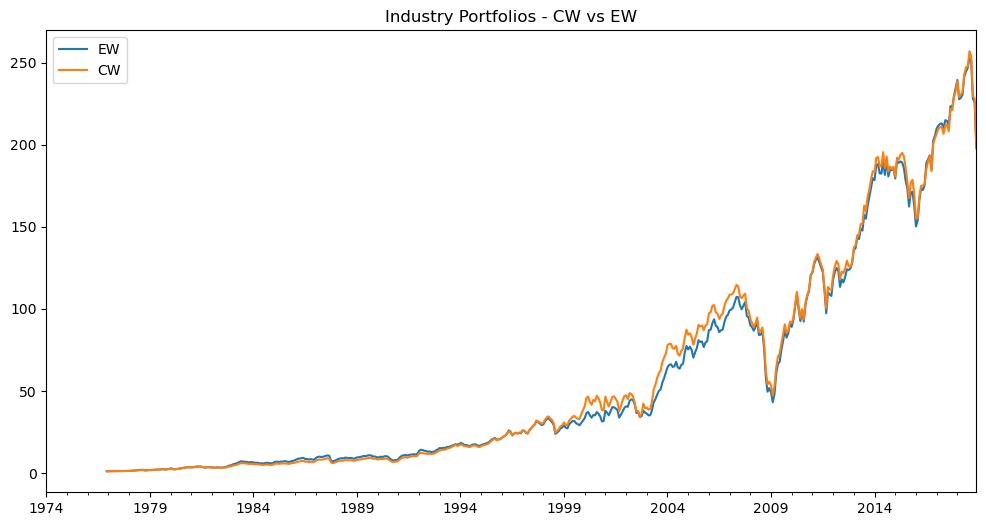

In [4]:
ewr = rk.backtest_ws(ind_rets, estimation_window=36, weighting=rk.weight_ew)
cwr = rk.backtest_ws(ind_rets, estimation_window=36, weighting=rk.weight_cw, cap_weights=ind_mcap)
btr = pd.DataFrame({'EW': ewr, 'CW':cwr})
(1+btr).cumprod().plot(figsize=(12, 6), title = "Industry Portfolios - CW vs EW")
rk.summary_stats(btr.dropna())

Running a backtest over nearly 50 years and both optimizing and rebalancing on a monthly basis.

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.133872,0.061363,-0.613456,6.736417,0.082009,0.122226,1.646850,-0.598060
CW,0.134043,0.061348,-0.523820,5.789868,0.081739,0.119803,1.650007,-0.588310
GMV-Sample,0.159488,0.031716,-0.530878,5.054899,0.036142,0.055959,3.973761,-0.332079


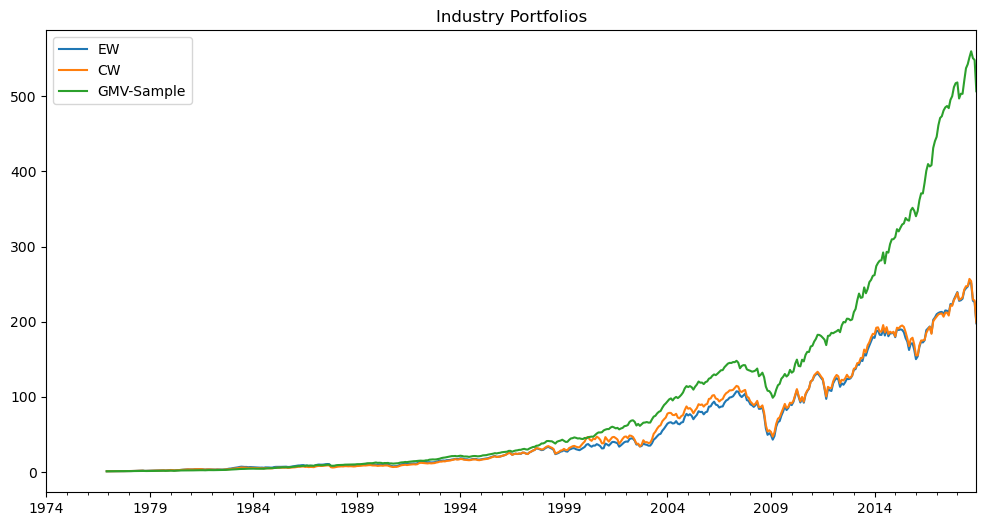

In [8]:
mv_s_r = rk.backtest_ws(ind_rets, estimation_window=36, weighting=rk.weight_gmv, cov_estimator=rk.sample_cov)
btr = pd.DataFrame({"EW": ewr, "CW": cwr, "GMV-Sample": mv_s_r})
(1+btr).cumprod().plot(figsize=(12, 6), title = "Industry Portfolios")
rk.summary_stats(btr.dropna())

Now, let's try a new estimator - Constant Correlation. The idea is simple, take the sample correlation matrix, compute the average correlation and then reconstruct the covariance matrix. The relation between correlations $\rho$ and covariance $\sigma$ is given by:

$$ \rho_{ij} = \frac{ \sigma_{ij} } { \sqrt{ \sigma_{ii}  \sigma_{jj} } } $$


/Users/ahmet/Desktop/Investment Banking & Asset Management/Investment-Banking-Asset-Management/Advanced Portfolio Construction and Analysis with Python/risk_kit.py:173: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if filetype is "returns":
/Users/ahmet/Desktop/Investment Banking & Asset Management/Investment-Banking-Asset-Management/Advanced Portfolio Construction and Analysis with Python/risk_kit.py:176: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif filetype is "nfirms":
/Users/ahmet/Desktop/Investment Banking & Asset Management/Investment-Banking-Asset-Management/Advanced Portfolio Construction and Analysis with Python/risk_kit.py:179: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif filetype is "size":


<Axes: >

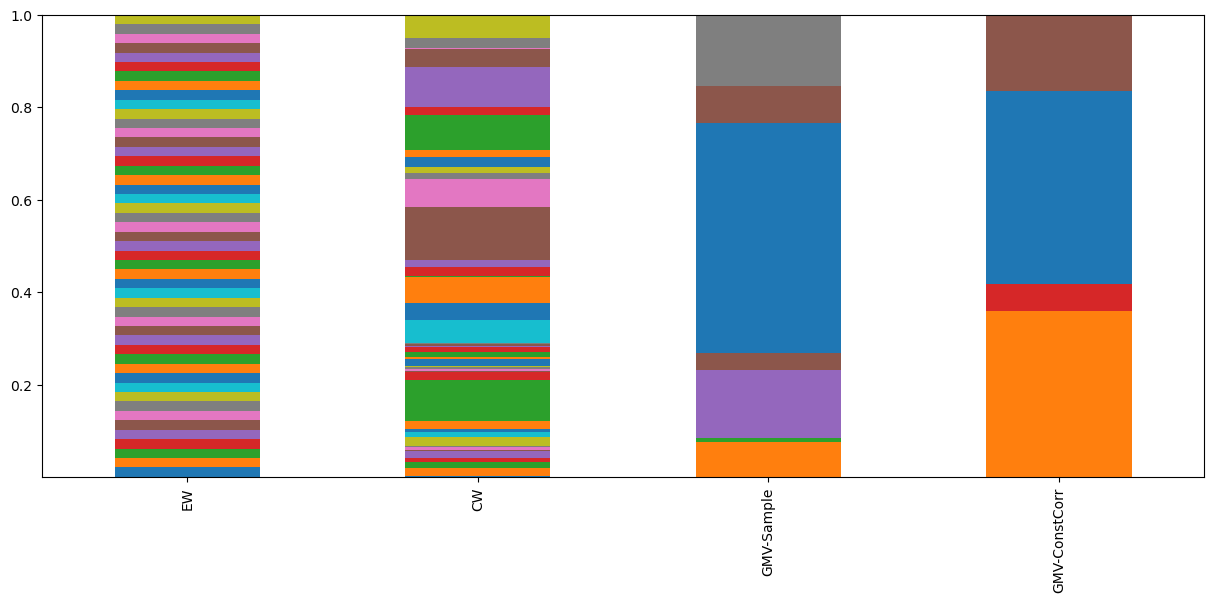

In [9]:
wts = pd.DataFrame({
    "EW": rk.weight_ew(ind_rets['2016':]),
    "CW": rk.weight_cw(ind_rets["2016":], cap_weights=ind_mcap),
    "GMV-Sample": rk.weight_gmv(ind_rets['2016':], cov_estimator=rk.sample_cov),
    "GMV-ConstCorr": rk.weight_gmv(ind_rets["2016":], cov_estimator=rk.cc_cov)
})

wts.T.plot.bar(stacked=True, figsize=(15, 6), legend=False)



,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.133872,0.061363,-0.613456,6.736417,0.082009,0.122226,1.646850,-0.598060
CW,0.134043,0.061348,-0.523820,5.789868,0.081739,0.119803,1.650007,-0.588310
GMV-Sample,0.159488,0.031716,-0.530878,5.054899,0.036142,0.055959,3.973761,-0.332079
GMV-CC,0.141791,0.033558,-0.500379,4.458364,0.040352,0.061776,3.242153,-0.421372


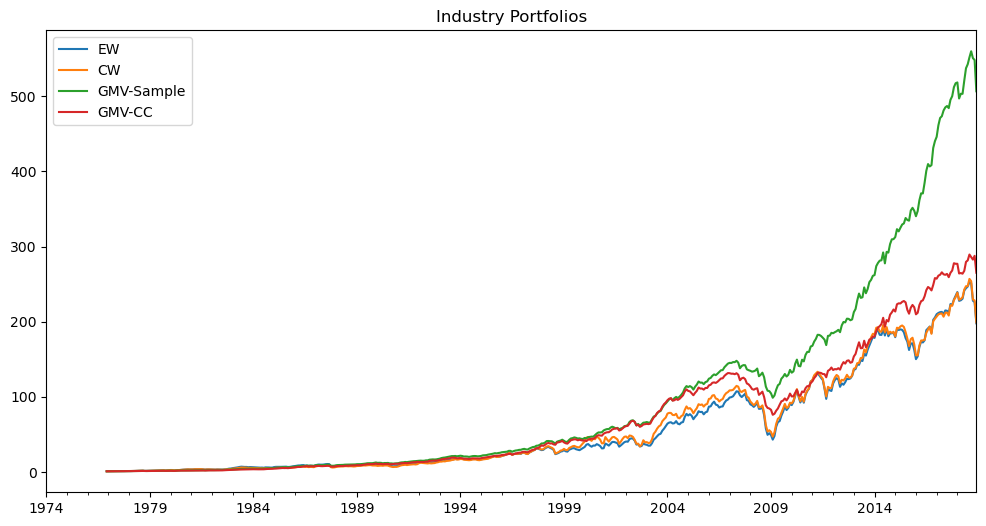

In [10]:
mv_cc_r = rk.backtest_ws(ind_rets, estimation_window=36, weighting=rk.weight_gmv, cov_estimator=rk.cc_cov)
btr = pd.DataFrame({"EW": ewr, "CW": cwr, "GMV-Sample": mv_s_r, "GMV-CC": mv_cc_r})
(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios")
rk.summary_stats(btr.dropna())

### Statistical Shrinkage

We can mix the model and sample estimates by choosing a shrinkage parameter. You can either let the numbers dictate an optimal shrinkage value for $\delta$ although in practice many practiotioners choose $0.5$. Let's implement a simple shrinkage based covariance estimator that shrinks towards the Constant Correlation estimate.

In [ ]:
wts = pd.DataFrame({
    "EW": rk.weight_ew(ind_rets["2013":]),
    "CW": rk.weight_cw(ind_rets["2013":], cap_weights=ind_mcap),
    "GMV-Sample": rk.weight_gmv(ind_rets["2013":], cov_estimator=rk.sample_cov),
    "GMV-ConstCorr": rk.weight_gmv(ind_rets["2013":], cov_estimator=rk.cc_cov),
    "GMV-Shrink 0.5": rk.weight_gmv(ind_rets["2013":], cov_estimator=rk.shrinkage_cov),
})
wts.T.plot.bar(stacked=True, figsize=(12,6), legend=False);